In [2]:
import load_data
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import time
import sys

In [3]:
#load data -- original data
training_data = load_data.read_data("train.csv")
testing_data = load_data.read_data("test.csv")
testing_labels = load_data.read_data("submission.csv")
X_train, X_test = load_data.vectorize_data(training_data, testing_data)

Y_train = np.array(training_data)[:, -1]
Y_test = np.array(testing_labels)[:, -1]

In [4]:
#load data -- pca data
X_train_pca = np.load('X_train_PCA.npy')
X_test_pca = np.load('X_test_PCA.npy')

In [5]:
#load data -- fld data
X_train_fld=np.load('X_train_FLD.npy')
X_test_fld=np.load('X_test_FLD.npy')

In [13]:
def wta(X_train, Y_train, X_test, Y_test):
    #grid searching
    clusters = list(range(1,30,1))
    param_grid = {
        'n_clusters' : [2],
        'init_size': list(range(3,50,10)),
        'max_iter' : [1000000],
        'batch_size' : [1]
    }

    clf = MiniBatchKMeans()
    grid_search = GridSearchCV(estimator = clf, param_grid = param_grid, n_jobs = -1)
    grid_search.fit(X_train, Y_train)
    print(grid_search.best_params_)

    t0 = time.time()
    mlp = MiniBatchKMeans(n_clusters=grid_search.best_params_['n_clusters'], init_size=grid_search.best_params_['init_size'], max_iter=grid_search.best_params_['max_iter'], batch_size=grid_search.best_params_['batch_size'])
    mlp.fit(X_train, Y_train)
    Y_pred = mlp.predict(X_test)
    t1 = time.time()
    print(f"run time: {t1-t0:.3f}s")
    #typecast to string to match X_test format
    Y_pred = [str(x) for x in Y_pred]

    precision, recall, fscore, train_support = score(Y_test, Y_pred, pos_label='1', average='binary')
    print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}'.format(
        round(precision, 3), round(recall, 3), round(fscore,3), round(acs(Y_test, Y_pred), 3)))

    cm = confusion_matrix(Y_test, Y_pred)
    class_label = ["0", "1"]
    df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
    sns.heatmap(df_cm, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    return 0

{'batch_size': 1, 'init_size': 13, 'max_iter': 1000000, 'n_clusters': 2}
run time: 13.579s
Precision: 0.43 / Recall: 1.0 / F1-Score: 0.601 / Accuracy: 0.43


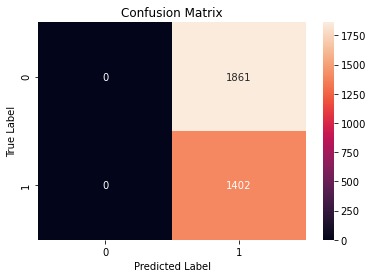

0

In [15]:
wta(X_train,Y_train,X_test,Y_test)

{'batch_size': 1, 'init_size': 3, 'max_iter': 1000000, 'n_clusters': 2}
run time: 16.119s
Precision: 0.43 / Recall: 1.0 / F1-Score: 0.601 / Accuracy: 0.43


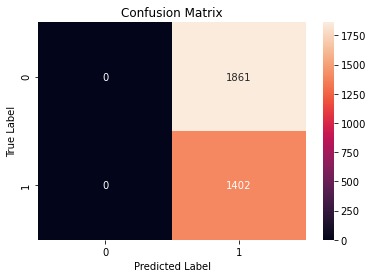

0

In [14]:
wta(X_train_pca,Y_train,X_test_pca,Y_test)

{'batch_size': 1, 'init': 'random', 'init_size': 33, 'max_iter': 1000000, 'n_clusters': 2}
run time: 2.053s
Precision: 0.677 / Recall: 0.665 / F1-Score: 0.671 / Accuracy: 0.72


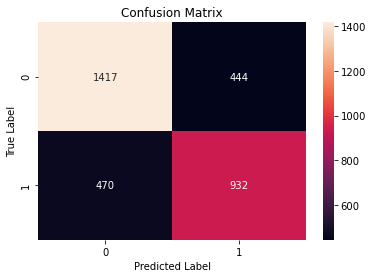

0

In [9]:
wta(X_train_fld,Y_train,X_test_fld,Y_test)